Universidade Federal de Goiás

Instituto de Informática

Programa de Pós-Graduação em Ciência da Computação

Disciplina de Aprendizado de Máquina

Professora: Dra. Cristhiane Gonçalves

Aluno Especial: Rogério Rodrigues Carvalho

.

.

**3ª Lista de Exercícios Computacionais**

Questão 1 – Considere as portas lógicas AND, OR e XOR. Monte a tabela verdade de cada uma e faça a classificação das mesmas utilizando como modelo a MLP. Para cada caso, determine um critério de parada e apresente o erro de treinamento em forma de um gráfico do MSE x iteração. Discuta se o modelo conseguiu alcançar 100 % de acerto e as razões para os resultados. Para cada caso, execute a rede pelo menos 10 vezes e varie o número de neurônios na camada escondida, mostrando a melhor configuração alcançada.


In [1]:
# Importar bibliotecas
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
# Dados das portas lógicas

X_and = [ # AND
     [0, 0], 
     [0, 1],
     [1, 0],
     [1, 1]]

X_or = [  # OR
     [0, 0], 
     [0, 1],
     [1, 0],
     [1, 1]]

X_xor = [ # XOR
     [0, 0], 
     [0, 1],
     [1, 0],
     [1, 1]]

y_and = [0, 0, 0, 1]

y_or = [0, 1, 1, 1]
    
y_xor = [0, 1, 1, 0]

In [3]:
# Função para plotar os gráficos: gráfico de linha contendo a evolução do erro 
# ao longo das iterações e gráfico de barra contendo a acurácia de cada execução

def plotar_graficos(erros, acuracia, porta_logica):

  plt.figure(figsize=(17, 8))

  # Gráfico de linha
  plt.subplot(121)
  plt.ylabel('MSE')
  plt.xlabel('iteração')  
  plt.ylim(0, 1.0)
  plt.plot(erros[0][1:], label='{0} neurônios'.format(erros[0][0]), color='blue')
  plt.plot(erros[1][1:], label='{0} neurônios'.format(erros[1][0]), color='red')
  plt.plot(erros[2][1:], label='{0} neurônios'.format(erros[2][0]), color='yellow')
  plt.plot(erros[3][1:], label='{0} neurônios'.format(erros[3][0]), color='gray')
  plt.legend(loc="upper left")

  # Gráfico de barra
  plt.subplot(122)
  plt.bar(['{0} neurônios'.format(acc[0]) for acc in acuracia], [acc[1] for acc in acuracia])
  plt.ylabel('Acurácia')
  xlocs, xlabs = plt.xticks()
  for i, v in enumerate([acc[1] for acc in acuracia]):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v), horizontalalignment='left')
  
  plt.suptitle('Resultados da porta lógica: {0}'.format(porta_logica))
  plt.show()

In [4]:
# Função para realizar a execução da MLP
def executar_MLP(X, y, iteracoes, neuronios, porta_logica):
  
  acuracia = []
  erros_de_treinamento = []

  # A váriavel 'neuronios' é uma lista contendo diferentes números para ser usado 
  # no parâmetros de quantidade de neurônios na camada escondida. Exemplo: neuronios=(5,10,50,100)
  # Então para cada número dessa lista será executado a MLP e computado o desempenho da rede (MSE e acurácia)
  for neuronio in neuronios:

    # Iniciado MLP com os parâmetros recebidos pela função
    # definindo o critério de parada igual a 0.01
    # definindo o random state = 42 para permitir a replicação dos resultados
    mlp = MLPClassifier(hidden_layer_sizes=neuronio, max_iter=iteracoes, learning_rate_init=0.01, verbose=False, random_state=42)

    erros_execucao_atual = []
    erros_execucao_atual.append(neuronio)

    # Realizar treinamento parcial e computar o MSE de cada execução
    for i in range(iteracoes):
      mlp.partial_fit(X, y, classes=[0, 1])
      y_pred = mlp.predict(X)
      erros_execucao_atual.append(mean_absolute_error(y, y_pred))

    
    acuracia.append([neuronio, mlp.score(X, y)])
    
    erros_de_treinamento.append(erros_execucao_atual)

  # Chamar função de plotar gráfico passando o erro e a acurácia por parâmetro
  plotar_graficos(erros_de_treinamento, acuracia, porta_logica)

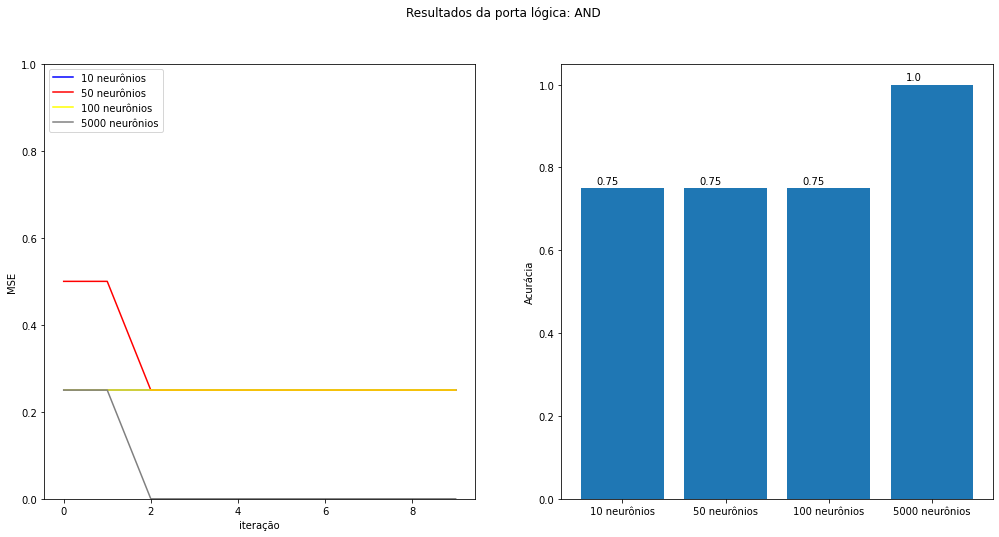

In [5]:
# Executar MLP para a porta lógica AND, com 10 execuções e com as seguintes variações de neurônios na camada escondida: 10, 50, 100, 5000
executar_MLP(X_and, y_and, iteracoes=10, neuronios=(10, 50, 100, 5000), porta_logica='AND')

### Análise da porta lógica AND

A execução da MLP com a porta lógica do AND se mostrou ter um bom resultado mesmo a rede tendo poucos neurônios na camada escondida. Com 10 neurônios já foi possível ter 75% de taxa de acerto e um baixo erro da métrica MSE.

Uma coisa interessante que podemos perceber é que somente com uma quantidade grande de neurônios (5000) na camada escondida que foi possível atingir 100% de acurácia. Com 5000 neurônios já na segunda iteração o MSE já atingiu o valor de 0%, ou seja, com 2 execuções a rede já tinha conseguido identificar o padrão para resolver este problema.


***


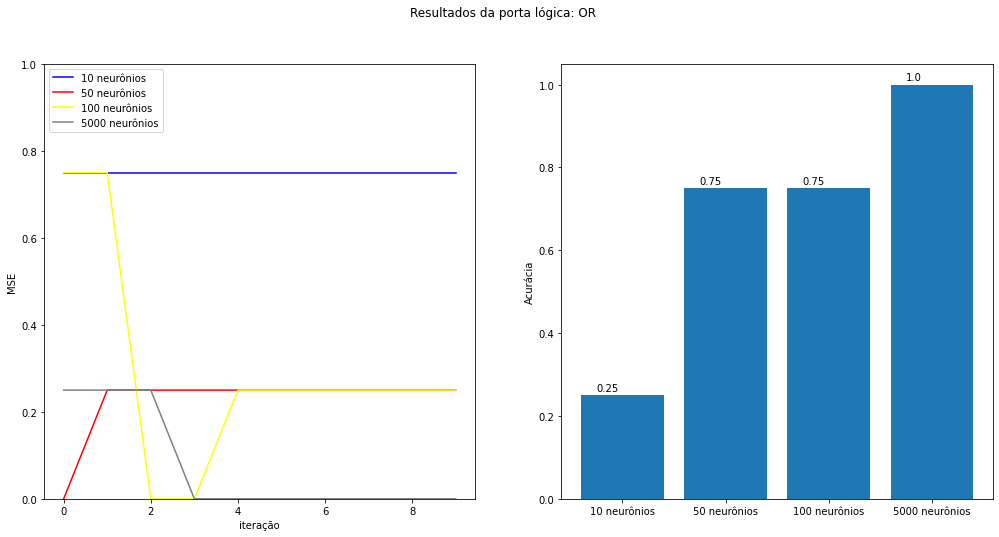

In [6]:
# Executar MLP para a porta lógica OR, com 10 execuções e com as seguintes variações de neurônios na camada escondida: 10, 50, 100, 5000
executar_MLP(X_or, y_or, iteracoes=10, neuronios=(10, 50, 100, 5000), porta_logica='OR')

### Análise da porta lógica OR

A porta lógica OR apresentou um comportamento interessante, neste problema ficou bem nítido que o aumento da quantidade de neurônios é fundamental para a melhoria no desempenho da rede MLP.

Com 10 neurônios a rede teve uma taxa de acerto muito baixa, de 25%, e um erro de MSE muito grande, de 75%. E com 50 neurônios a rede já passou a ter uma boa taxa de acerto de 75%. Mas somente com uma grande quantidade de neurônios foi possível atingir uma acurácia de 100%, semelhante ao que aconteceu no problema do AND.

Podemos perceber uma coisa intrigante no gráfico do MSE: a rede MLP executando com 50 neurônios, na sua primeira iteração teve um MSE de 0%, e depois nas próximas iterações esse erro fez foi aumentar em vez de diminuir.
***


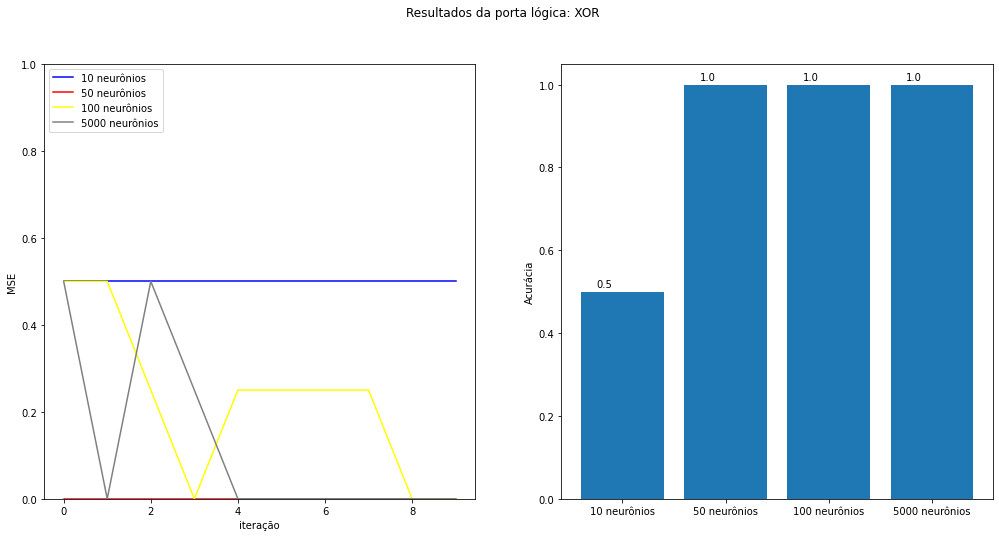

In [7]:
# Executar MLP para a porta lógica XOR, com 10 execuções e com as seguintes variações de neurônios na camada escondida: 10, 50, 100, 5000
executar_MLP(X_xor, y_xor, iteracoes=10, neuronios=(10, 50, 100, 5000), porta_logica='XOR')

### Análise da porta lógica XOR

O resultado da execução da rede MLP no problema da porta lógica XOR se diferenciou do resultado do AND e OR, pois com baixa quantidade de neurônios já foi possível atingir taxa de acerto de 100%. Com 50 neurônios já foi possível atingir essa taxa de acerto.
***
